In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets
data = pd.read_csv('dados_banco.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data.head(11)

Número de linhas e colunas: (10000, 11)


,Unnamed: 0,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
0,75928,75928,M,32,Privada,5719.00,933.79,0.00,0.00,6023.68,0
1,52921,52921,F,28,Privada,5064.00,628.37,0.00,0.00,1578.24,0
2,8387,8387,F,24,Autônomo,4739.00,889.18,0.00,0.00,2578.70,0
3,54522,54522,M,30,Pública,5215.00,1141.47,0.00,0.00,4348.96,0
4,45397,45397,M,30,Autônomo,5215.56,520.70,0.00,0.00,1516.78,1
5,59597,59597,M,34,Privada,5443.00,783.61,0.00,0.00,3585.23,0
6,81859,81859,F,29,Privada,4977.42,540.36,0.00,0.00,4485.24,1
7,52067,52067,F,33,Privada,5337.08,472.37,0.00,0.00,3714.89,1
8,51380,51380,M,32,Autônomo,5234.00,945.52,15748.31,9482.78,0.00,0
9,68076,68076,M,32,Privada,5492.00,1121.00,0.00,0.00,2400.88,0


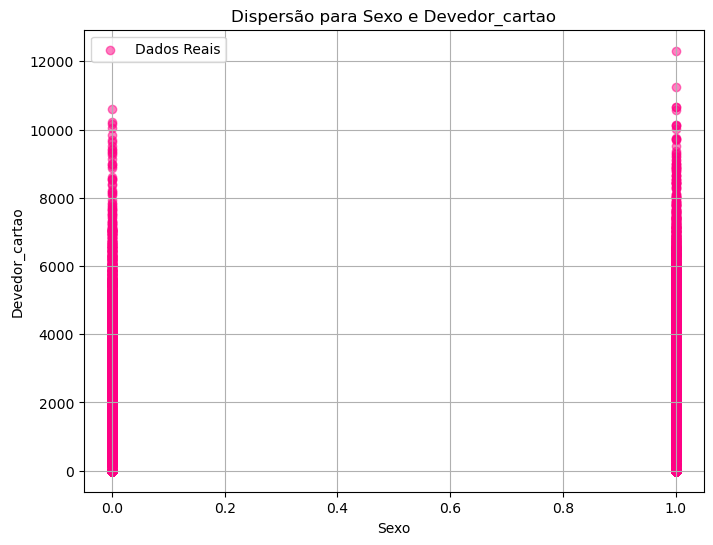

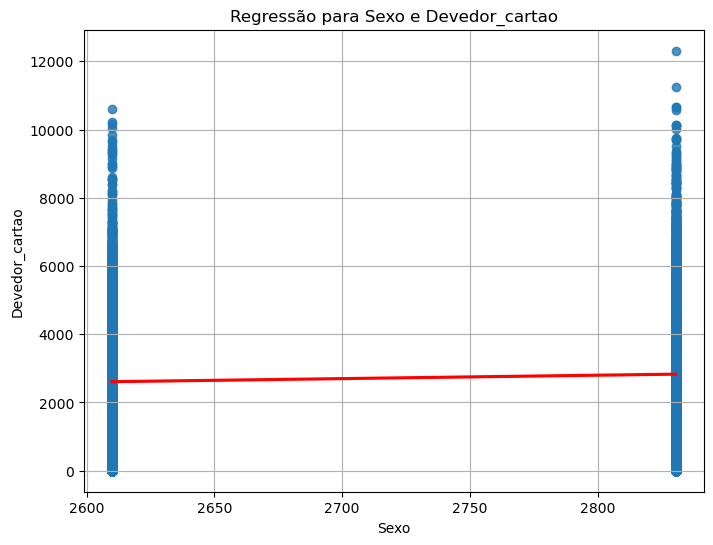

Coeficiente de correlação de Pearson: 0.05464958406982866
Coeficiente de determinação (R²): 0.0029865770390054003
-----------------------------------------


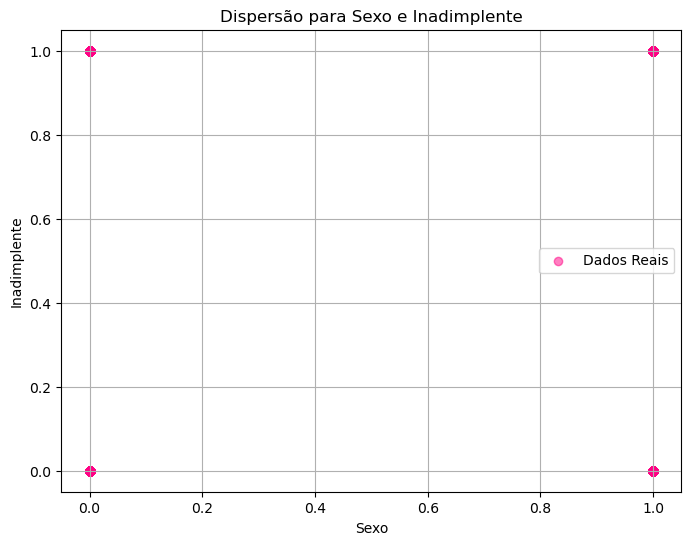

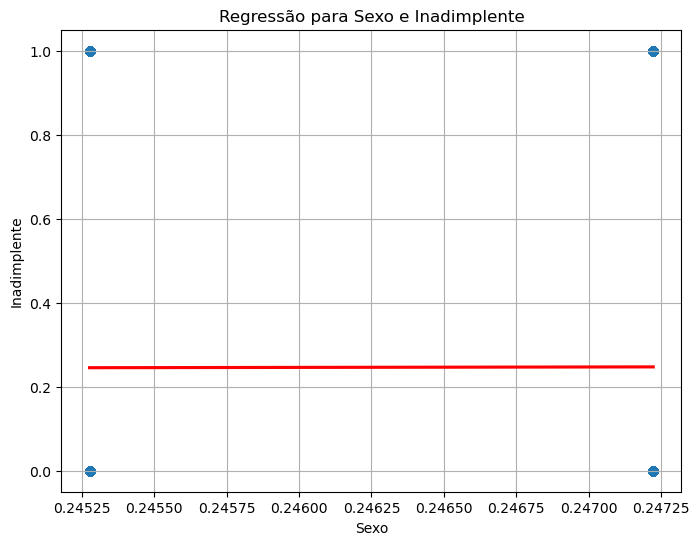

Coeficiente de correlação de Pearson: 0.0022324997994831834
Coeficiente de determinação (R²): 4.984055354873007e-06
-----------------------------------------


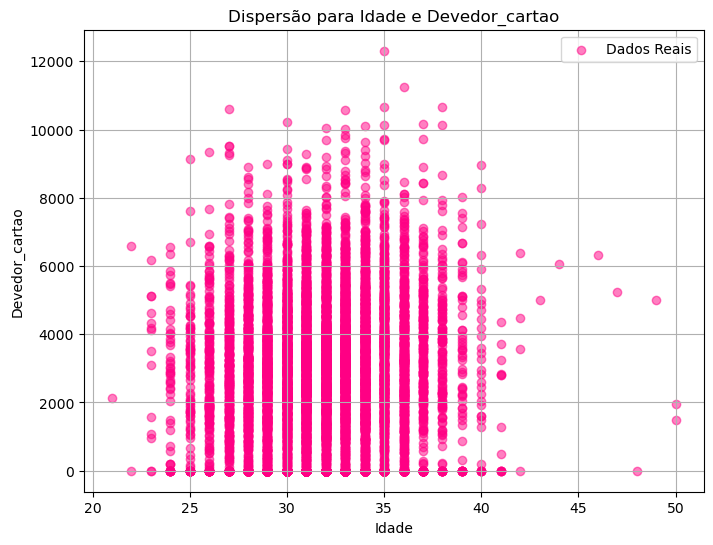

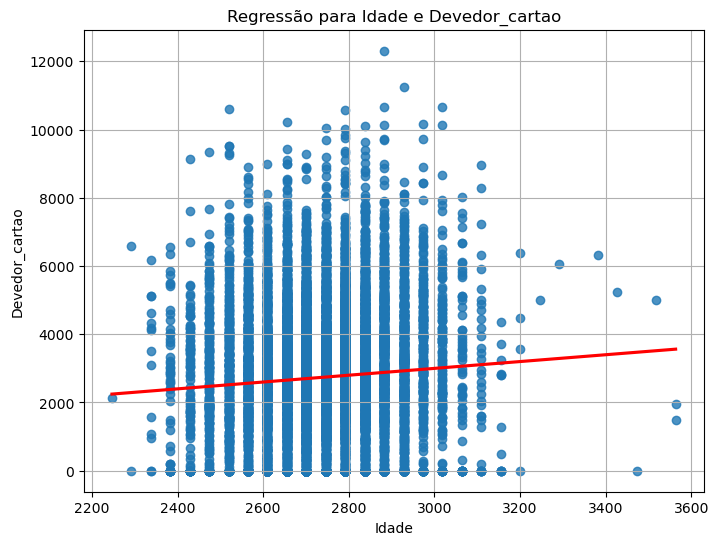

Coeficiente de correlação de Pearson: 0.06674086550017158
Coeficiente de determinação (R²): 0.004454343127712201
-----------------------------------------


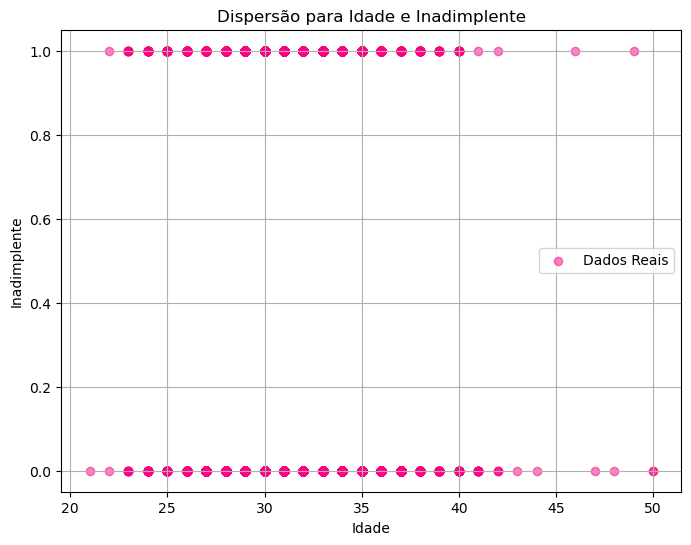

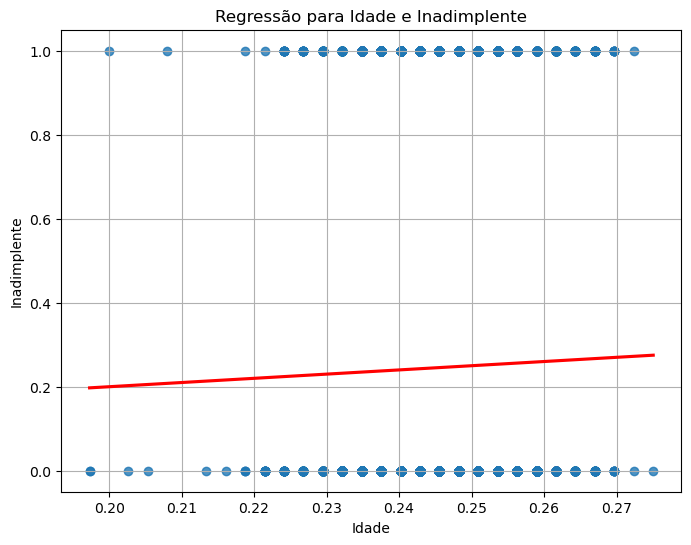

Coeficiente de correlação de Pearson: 0.018250863757284554
Coeficiente de determinação (R²): 0.0003330940278870598
-----------------------------------------


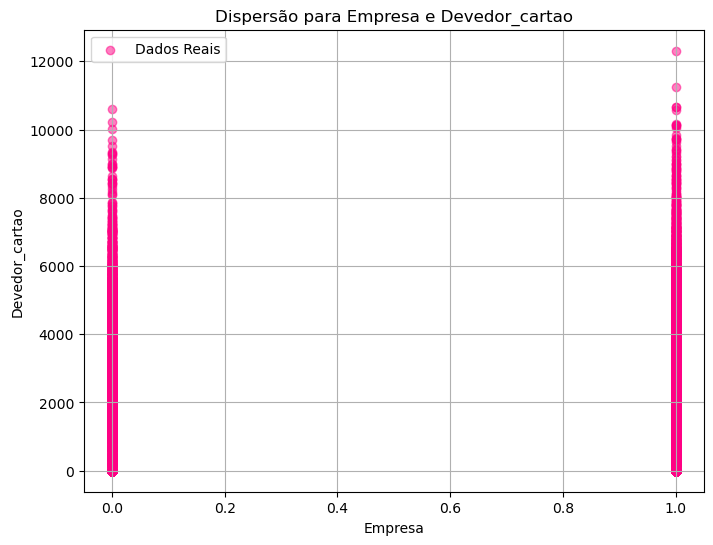

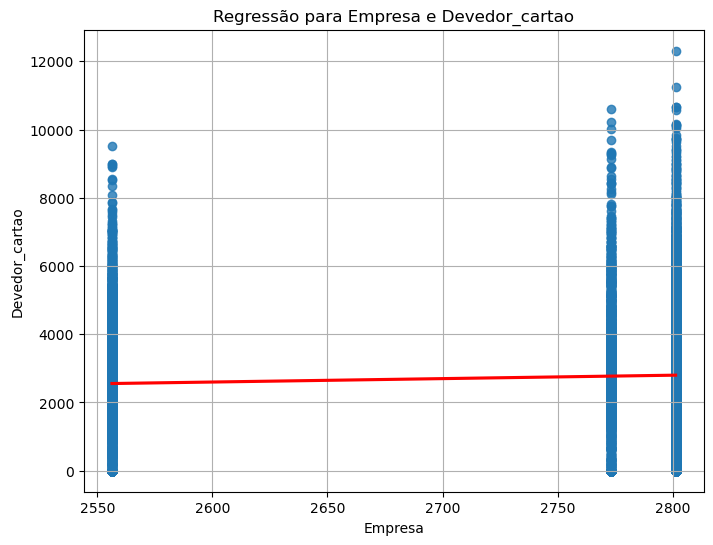

Coeficiente de correlação de Pearson: 0.05187132365471424
Coeficiente de determinação (R²): 0.0026906342176922227
-----------------------------------------


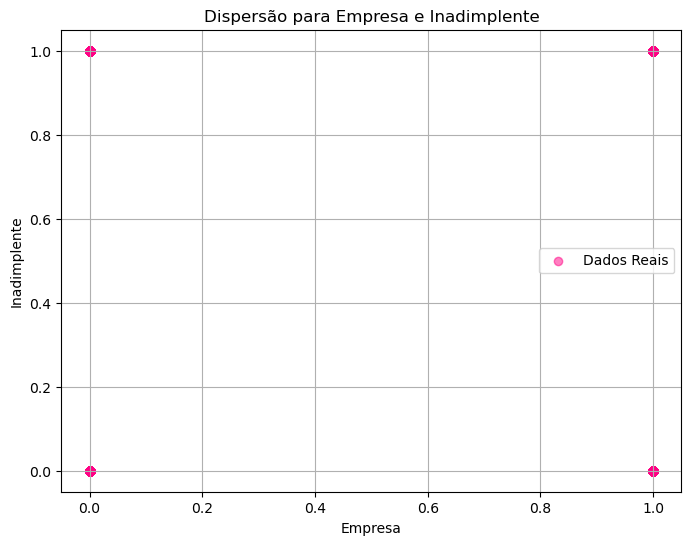

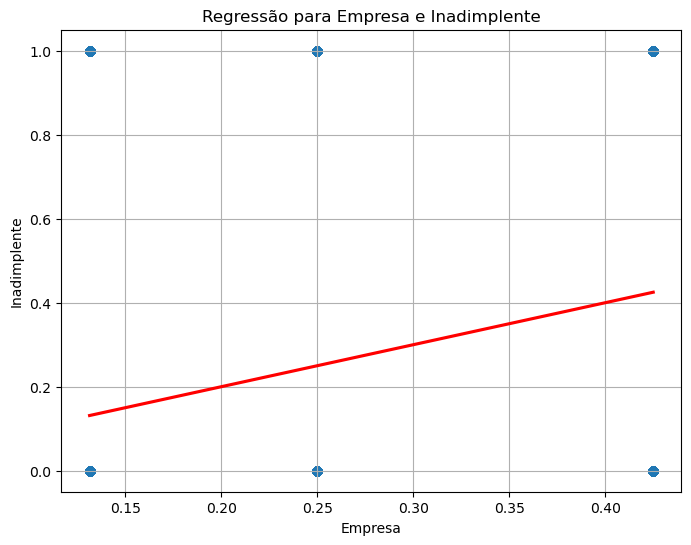

Coeficiente de correlação de Pearson: 0.20584686126369334
Coeficiente de determinação (R²): 0.04237293029211442
-----------------------------------------


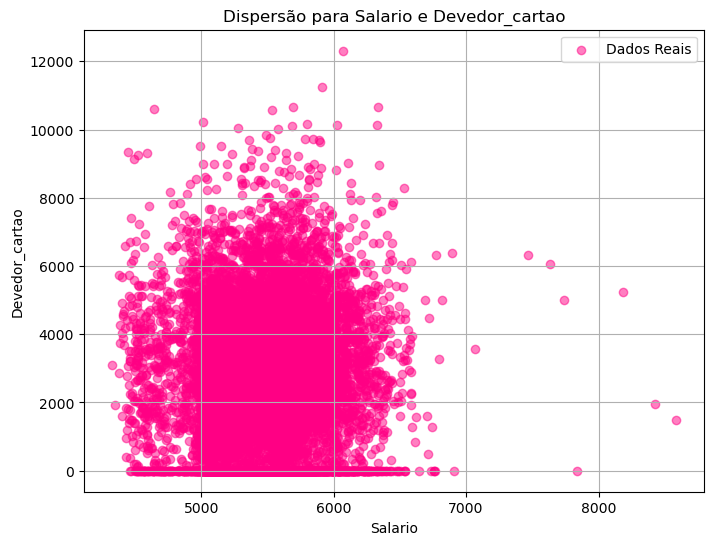

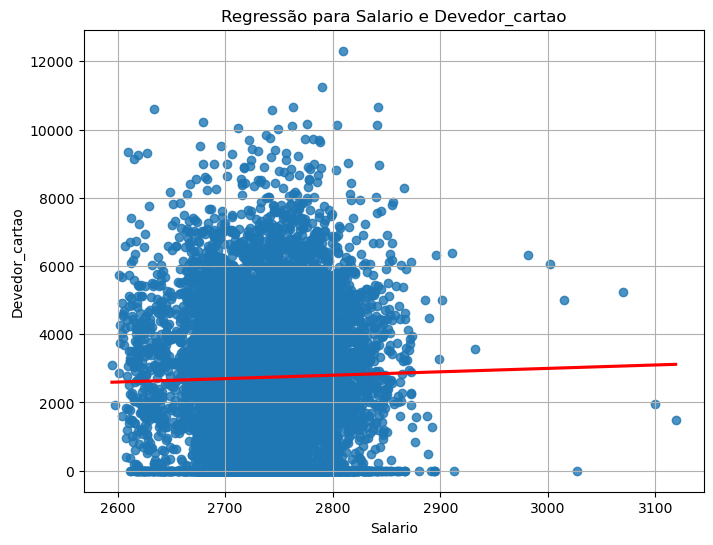

Coeficiente de correlação de Pearson: 0.02430402975085043
Coeficiente de determinação (R²): 0.0005906858621302913
-----------------------------------------


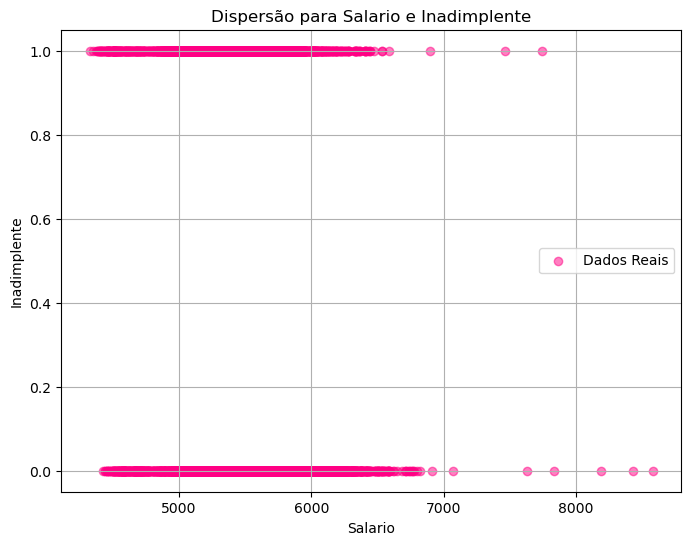

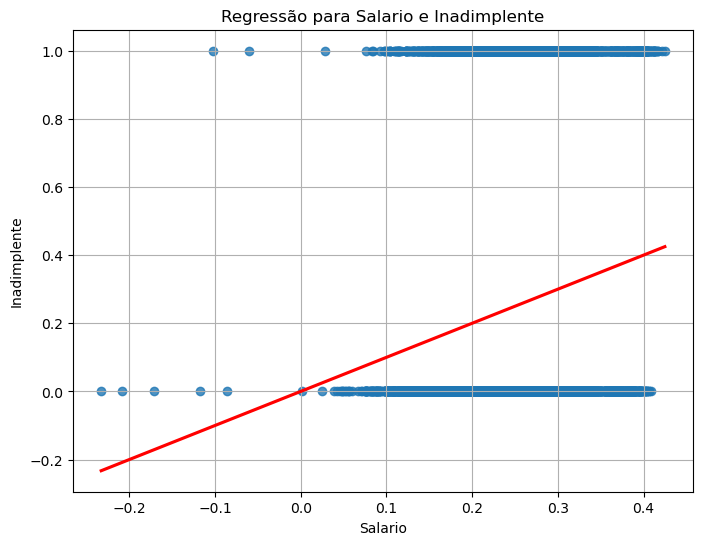

Coeficiente de correlação de Pearson: 0.14125169459866643
Coeficiente de determinação (R²): 0.019952041226995232
-----------------------------------------


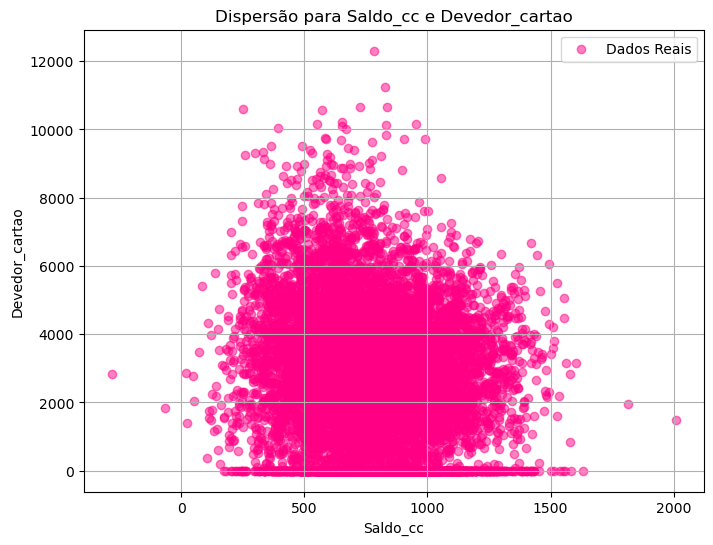

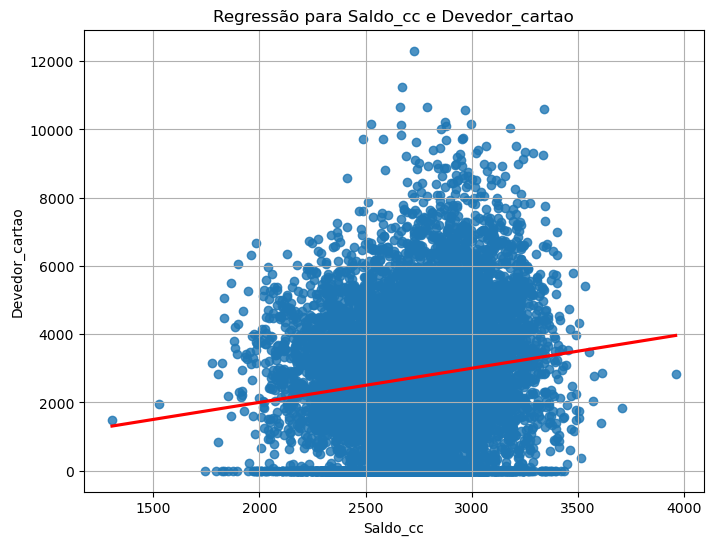

Coeficiente de correlação de Pearson: 0.1437074930950865
Coeficiente de determinação (R²): 0.0206518435716746
-----------------------------------------


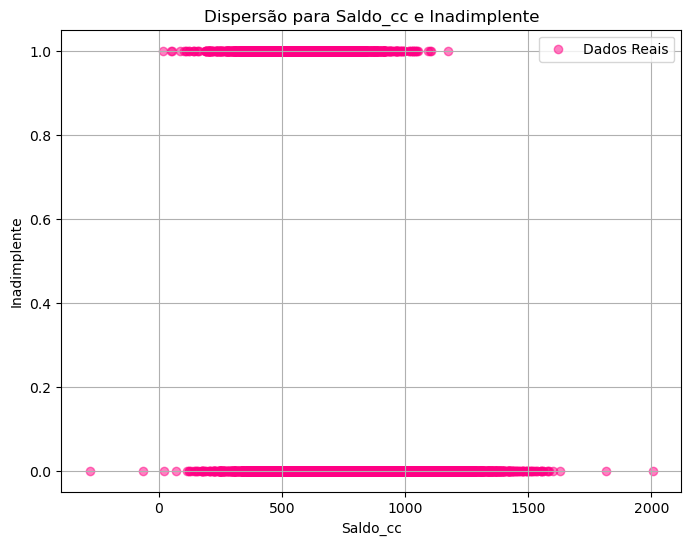

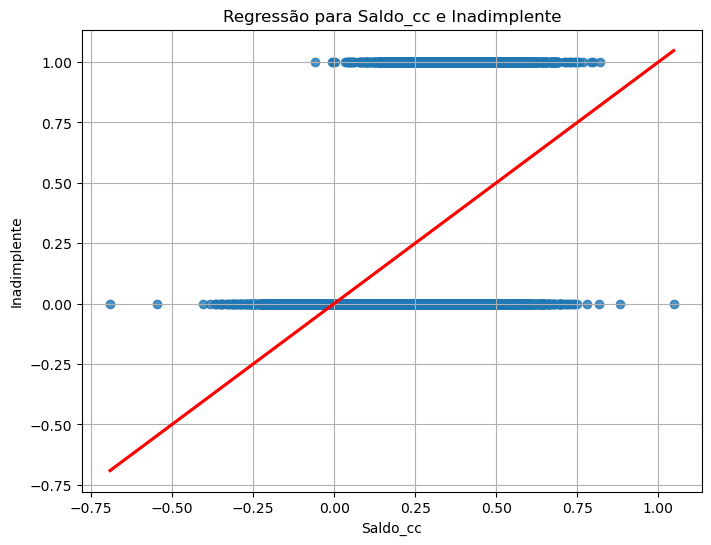

Coeficiente de correlação de Pearson: 0.4357944916225905
Coeficiente de determinação (R²): 0.18991683892859246
-----------------------------------------


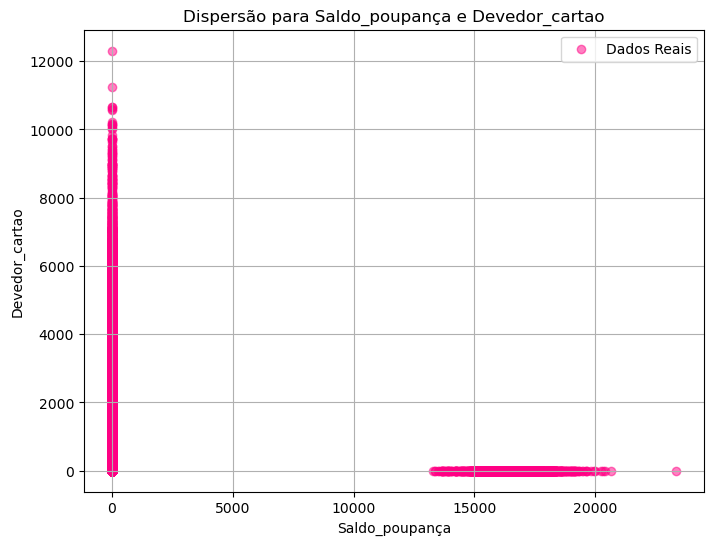

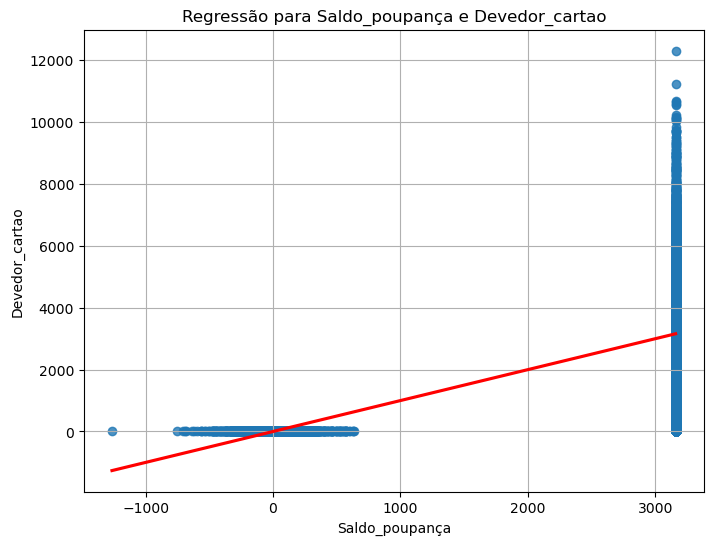

Coeficiente de correlação de Pearson: 0.538498857828426
Coeficiente de determinação (R²): 0.28998101988251945
-----------------------------------------


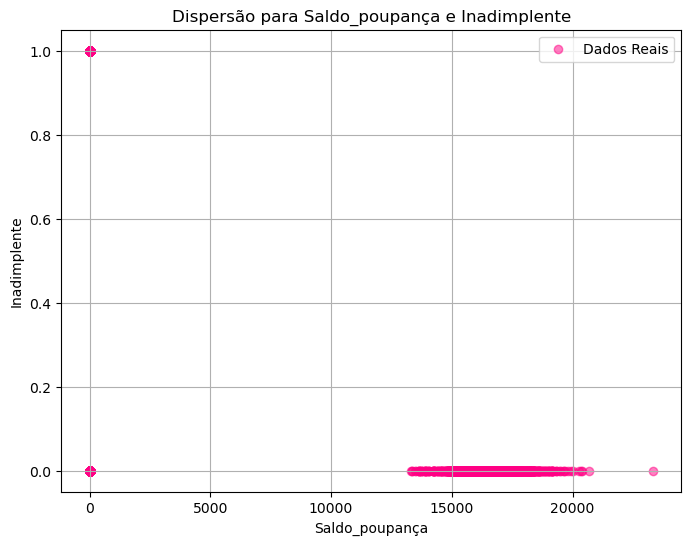

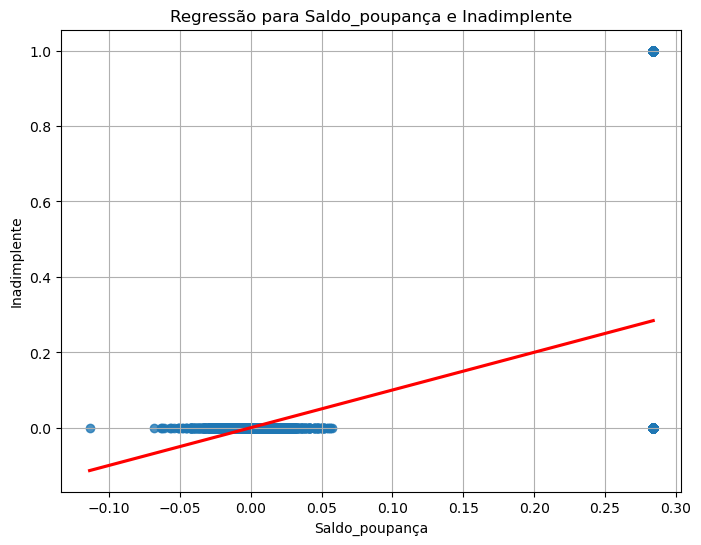

Coeficiente de correlação de Pearson: 0.22421771141105135
Coeficiente de determinação (R²): 0.05027358211040944
-----------------------------------------


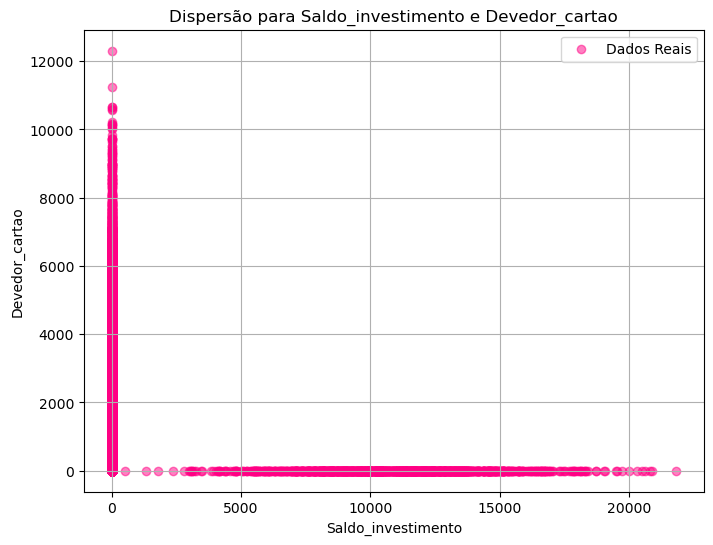

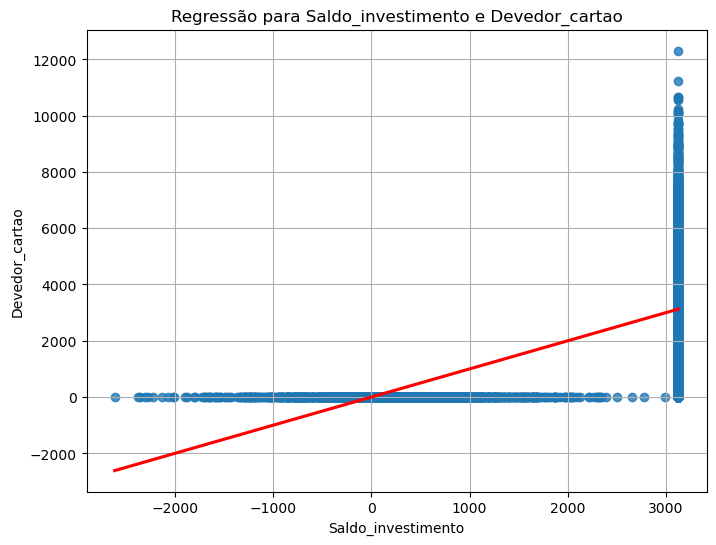

Coeficiente de correlação de Pearson: 0.5170192506950376
Coeficiente de determinação (R²): 0.26730890558925813
-----------------------------------------


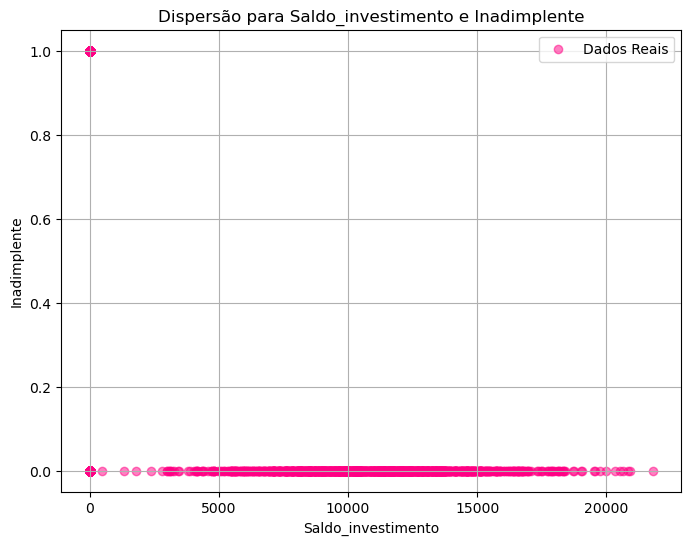

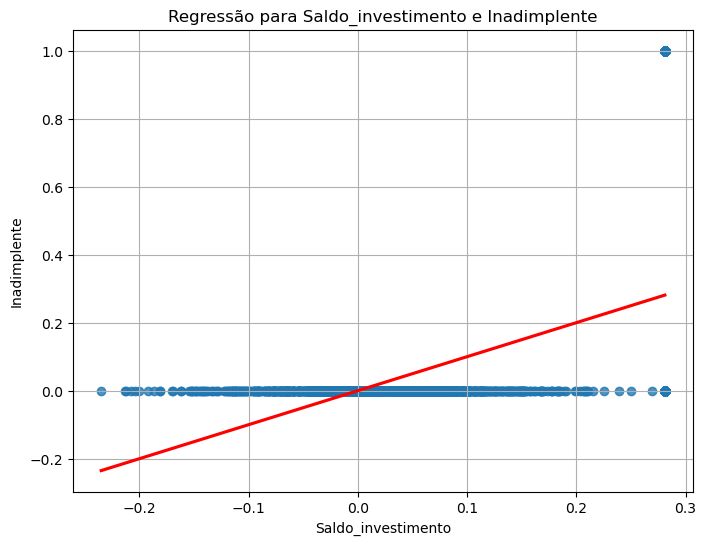

Coeficiente de correlação de Pearson: 0.21527413003953505
Coeficiente de determinação (R²): 0.04634295106427888
-----------------------------------------


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Leitura dos dados
data = pd.read_csv('dados_banco.csv')

# Selecionando as variáveis dependentes (y)
variaveis_dependentes = ['Devedor_cartao', 'Inadimplente']

# Selecionando todas as variáveis independentes (x)
variaveis_independentes = ['Sexo', 'Idade', 'Empresa', 'Salario', 'Saldo_cc', 'Saldo_poupança', 'Saldo_investimento']

# Iterando sobre as variáveis independentes
for variavel_independente in variaveis_independentes:
    # Iterando sobre as variáveis dependentes
    for variavel_dependente in variaveis_dependentes:
        # Selecionando a variável dependente (y) para esta regressão
        y = data[variavel_dependente]
        
        # Selecionando a variável independente (x) para esta regressão
        x = data[[variavel_independente]]
        
        # Convertendo variáveis categóricas em variáveis dummy (one-hot encoding)
        if x[variavel_independente].dtype == 'object':
            x = pd.get_dummies(x, drop_first=True)
        
        # Ajustando o modelo de regressão linear
        model = LinearRegression().fit(x, y)
        
        # Coeficiente de determinação (R²)
        r_squared = model.score(x, y)
        
        # Coeficiente de correlação de Pearson
        pearson_corr, _ = pearsonr(y, model.predict(x))
        
        # Plotando o gráfico de dispersão
        plt.figure(figsize=(8, 6))
        plt.scatter(x.iloc[:, 0], y, alpha=0.5, label='Dados Reais', color='#ff0084')
        plt.title(f'Dispersão para {variavel_independente} e {variavel_dependente}')
        plt.xlabel(variavel_independente)
        plt.ylabel(variavel_dependente)
        plt.grid(True)
        plt.legend()
        plt.show()

        # Plotando o gráfico com a reta ajustada
        plt.figure(figsize=(8, 6))
        sns.regplot(x=model.predict(x), y=y, ci=None, line_kws={"color": "red"})
        plt.title(f'Regressão para {variavel_independente} e {variavel_dependente}')
        plt.xlabel(variavel_independente)
        plt.ylabel(variavel_dependente)
        plt.grid(True)
        plt.show()
        
        # Imprimindo os resultados
        print(f"Coeficiente de correlação de Pearson: {pearson_corr}")
        print(f"Coeficiente de determinação (R²): {r_squared}")
        print("-----------------------------------------")


In [8]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Leitura dos dados
data = pd.read_csv('dados_banco.csv')

# Selecionando as variáveis dependentes (y) que existem no conjunto de dados
variaveis_dependentes = ['Inadimplente', 'Devedor_cartao']  # Adicione mais variáveis dependentes se houver

# Convertendo variáveis categóricas em variáveis dummy (one-hot encoding)
data = pd.get_dummies(data, drop_first=True)

# Selecionando as variáveis independentes (x)
variaveis_independentes = ['Idade', 'Salario', 'Saldo_cc', 'Saldo_poupança', 'Saldo_investimento']

# Adicionando a constante para o termo de interceptação
x = sm.add_constant(data[variaveis_independentes])

# Ajustando o modelo de regressão linear múltipla para cada variável dependente
for var in variaveis_dependentes:
    if var not in data.columns:
        print(f"Variável dependente '{var}' não encontrada nos dados.")
        continue
    
    y = data[var]
    
    # Usando statsmodels
    model = sm.OLS(y, x).fit()
    
    # Usando scikit-learn
    lin_reg = LinearRegression()
    lin_reg.fit(x, y)
    y_pred = lin_reg.predict(x)
    
    # Exibindo o resumo do modelo de forma tabular para cada variável dependente
    print(f"\nResumo do Modelo de Regressão Linear Múltipla para '{var}':")
    print(tabulate(model.summary2().tables[1], headers='keys', tablefmt='grid'))
    
    # Exibindo o coeficiente de determinação (R²) usando statsmodels
    print(f"\nR² para '{var}' usando statsmodels: {model.rsquared:.4f}")
    
    # Exibindo o coeficiente de determinação (R²) usando scikit-learn
    print(f"R² para '{var}' usando scikit-learn: {r2_score(y, y_pred):.4f}")
    
    # Identificando variáveis com p-valor > 0.05
    significance_level = 0.05
    insignificant_vars = model.summary2().tables[1][model.summary2().tables[1]['P>|t|'] > significance_level].index.tolist()
    
    # Verificando se 'const' está na lista antes de tentar removê-la
    if 'const' in insignificant_vars:
        insignificant_vars.remove('const')  # Remover a constante da lista de variáveis a serem descartadas

    print(f"\nVariáveis independentes a serem descartadas para '{var}' (p-valor > 0.05): {insignificant_vars}")

    # Imprimindo resultados adicionais do modelo
    print(f"\nResultados adicionais do modelo '{var}':")
    print("Dep. Variable:", model.model.endog_names)
    print("Model:", model.model.__class__.__name__)
    print("No. Observations:", int(model.nobs))
    print("Df Residuals:", int(model.df_resid))
    print("Df Model:", int(model.df_model))
    print("Covariance Type:", model.cov_type)
    print("R-squared:", round(model.rsquared, 4))
    print("Adj. R-squared:", round(model.rsquared_adj, 4))
    print("F-statistic:", round(model.fvalue, 4))
    print("Prob (F-statistic):", round(model.f_pvalue, 4))
    print("Log-Likelihood:", round(model.llf, 4))
    print("AIC:", round(model.aic, 4))
    print("BIC:", round(model.bic, 4))

    # Teste de normalidade
    print("\nTeste de Normalidade (Jarque-Bera):")
    jb_stat, jb_p_value, _, _ = sm.stats.stattools.jarque_bera(model.resid)
    print("Jarque-Bera (JB):", round(jb_stat, 4))
    print("Prob(JB):", round(jb_p_value, 4))



Resumo do Modelo de Regressão Linear Múltipla para 'Inadimplente':
+--------------------+--------------+-------------+-----------+-------------+--------------+--------------+
|                    |        Coef. |    Std.Err. |         t |       P>|t| |       [0.025 |       0.975] |
+====================+==============+=============+===========+=============+==============+==============+
| const              |  0.30609     | 0.0559089   |   5.47481 | 4.48584e-08 |  0.196498    |  0.415683    |
+--------------------+--------------+-------------+-----------+-------------+--------------+--------------+
| Idade              |  0.0431454   | 0.00242174  |  17.8159  | 6.37633e-70 |  0.0383983   |  0.0478925   |
+--------------------+--------------+-------------+-----------+-------------+--------------+--------------+
| Salario            | -0.000140638 | 1.94106e-05 |  -7.24544 | 4.62902e-13 | -0.000178687 | -0.00010259  |
+--------------------+--------------+-------------+-----------+-----

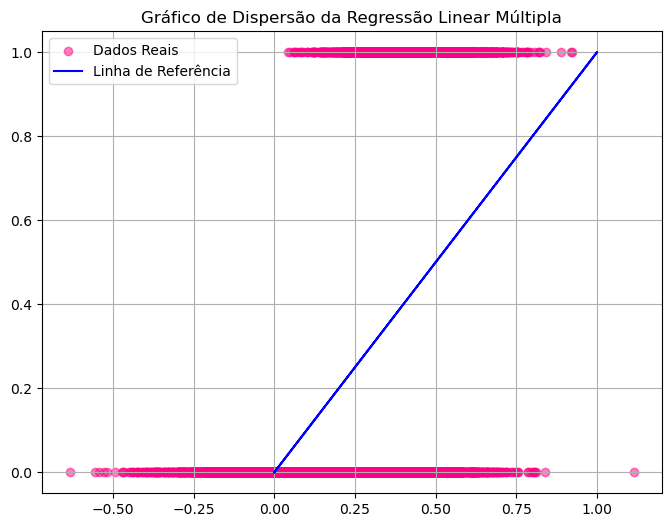

Coeficiente de correlação de Pearson: 0.5059304558666964
Coeficiente de determinação (R²): 0.2559656261734833


In [11]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Leitura dos dados
data = pd.read_csv('dados_banco.csv')

# Selecionando a variável dependente (y)
variavel_dependente = 'Inadimplente'

# Convertendo variáveis categóricas em variáveis dummy (one-hot encoding)
data = pd.get_dummies(data, drop_first=True)

# Selecionando as variáveis independentes (x)
variaveis_independentes = ['Idade', 'Salario', 'Saldo_cc', 'Saldo_poupança', 'Saldo_investimento']

# Adicionando a constante para o termo de interceptação
x = sm.add_constant(data[variaveis_independentes])

# Selecionando a variável dependente (y)
y = data[variavel_dependente]

# Ajustando o modelo de regressão linear múltipla
model = sm.OLS(y.astype(float), x.astype(float)).fit()

# Calculando os valores ajustados pelo modelo
predicted_values = model.predict(x)

# Coeficiente de correlação de Pearson
pearson_corr, _ = pearsonr(y, predicted_values)

# Coeficiente de determinação (R²)
r_squared = model.rsquared

# Plotando o gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, y, alpha=0.5, label='Dados Reais', color='#ff0084')
plt.plot(y, y, color='blue', label='Linha de Referência')  # Linha de referência: valores reais vs. valores reais
plt.title('Gráfico de Dispersão da Regressão Linear Múltipla')
plt.legend()
plt.grid(True)
plt.show()

# Imprimindo os resultados
print(f"Coeficiente de correlação de Pearson: {pearson_corr}")
print(f"Coeficiente de determinação (R²): {r_squared}")


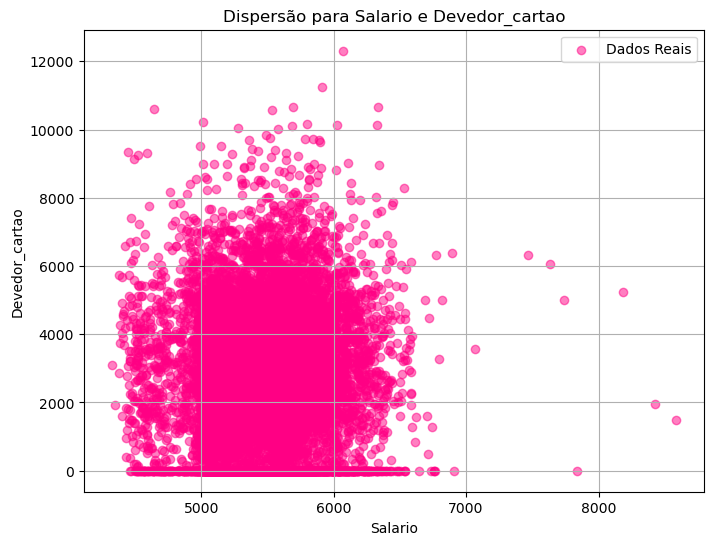

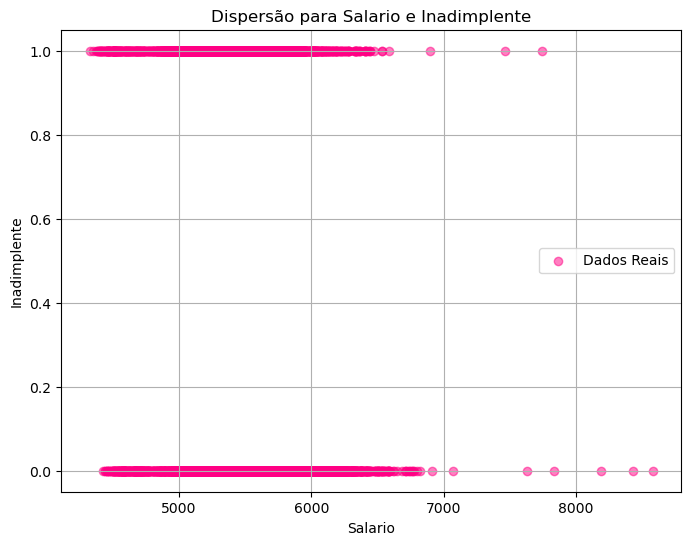

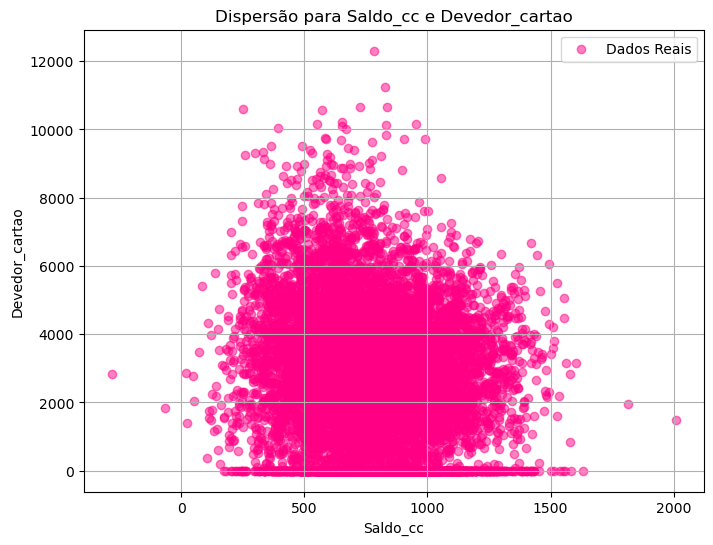

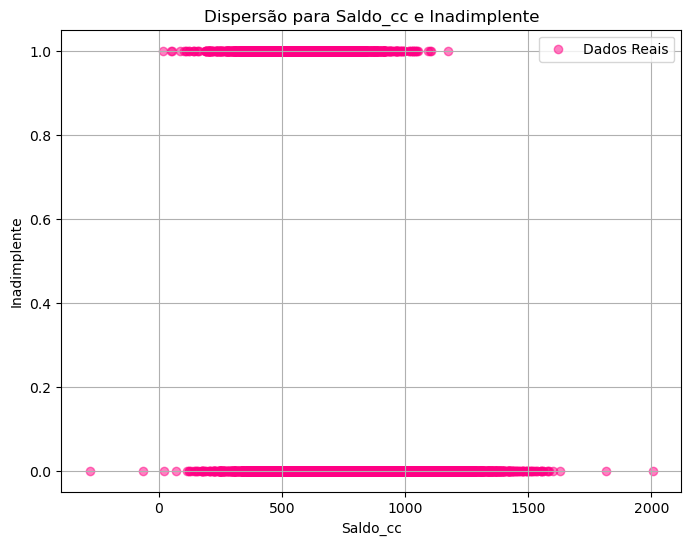

Coeficiente de correlação de Pearson para Salario e Devedor_cartao: 0.024304029750850477
Coeficiente de correlação de Pearson para Salario e Inadimplente: -0.14125169459866643
Coeficiente de correlação de Pearson para Saldo_cc e Devedor_cartao: -0.1437074930950865
Coeficiente de correlação de Pearson para Saldo_cc e Inadimplente: -0.43579449162259054
Para Devedor_cartao, 'Salario' é mais disperso que 'Saldo_cc' com um coeficiente de correlação de 0.024304029750850477.
Para Inadimplente, 'Salario' é mais disperso que 'Saldo_cc' com um coeficiente de correlação de -0.14125169459866643.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Leitura dos dados
data = pd.read_csv('dados_banco.csv')

# Selecionando as variáveis dependentes (y)
variaveis_dependentes = ['Devedor_cartao', 'Inadimplente']

# Selecionando as variáveis independentes (x)
variaveis_independentes = ['Salario', 'Saldo_cc']

# Dicionário para armazenar os coeficientes de correlação de Pearson
pearson_corrs = {}

# Iterando sobre as variáveis independentes
for variavel_independente in variaveis_independentes:
    # Iterando sobre as variáveis dependentes
    for variavel_dependente in variaveis_dependentes:
        # Selecionando a variável dependente (y) e independente (x)
        x = data[variavel_independente]
        y = data[variavel_dependente]
        
        # Coeficiente de correlação de Pearson
        pearson_corr, _ = pearsonr(x, y)
        pearson_corrs[(variavel_independente, variavel_dependente)] = pearson_corr
        
        # Plotando o gráfico de dispersão
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, alpha=0.5, label='Dados Reais', color='#ff0084')
        plt.title(f'Dispersão para {variavel_independente} e {variavel_dependente}')
        plt.xlabel(variavel_independente)
        plt.ylabel(variavel_dependente)
        plt.grid(True)
        plt.legend()
        plt.show()

# Imprimindo os coeficientes de correlação de Pearson
for key, value in pearson_corrs.items():
    print(f"Coeficiente de correlação de Pearson para {key[0]} e {key[1]}: {value}")

# Comparando os coeficientes de correlação para determinar qual é mais disperso
for dependente in variaveis_dependentes:
    corr_salario = pearson_corrs[('Salario', dependente)]
    corr_saldo_cc = pearson_corrs[('Saldo_cc', dependente)]
    if abs(corr_salario) > abs(corr_saldo_cc):
        print(f"Para {dependente}, 'Saldo_cc' é mais disperso que 'Salario' com um coeficiente de correlação de {corr_saldo_cc}.")
    else:
        print(f"Para {dependente}, 'Salario' é mais disperso que 'Saldo_cc' com um coeficiente de correlação de {corr_salario}.")
